In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
%matplotlib inline

## Specify the model to be used
COCO and MPI are body pose estimation model. COCO has 18 points and MPI has 15 points as output.

HAND is hand keypoints estimation model. It has 22 points as output

Ensure that the model files are available in the folders.

In [2]:
MODE = "MPI"

if MODE is "COCO":
    protoFile = "Models/coco/pose_deploy_linevec.prototxt"
    weightsFile = "Models/coco/pose_iter_440000.caffemodel"
    nPoints = 18
    POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]

elif MODE is "MPI" :
    protoFile = "Models/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
    weightsFile = "Models/mpi/pose_iter_160000.caffemodel"
    nPoints = 15
    POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]
    

<b>COCO Output Format</b> Nose – 0, Neck – 1, Right Shoulder – 2, Right Elbow – 3, Right Wrist – 4, Left Shoulder – 5, Left Elbow – 6, Left Wrist – 7, Right Hip – 8, Right Knee – 9, Right Ankle – 10, Left Hip – 11, Left Knee – 12, LAnkle – 13, Right Eye – 14, Left Eye – 15, Right Ear – 16, Left Ear – 17, Background – 18

<b>MPII Output Format</b> Head – 0, Neck – 1, Right Shoulder – 2, Right Elbow – 3, Right Wrist – 4, Left Shoulder – 5, Left Elbow – 6, Left Wrist – 7, Right Hip – 8, Right Knee – 9, Right Ankle – 10, Left Hip – 11, Left Knee – 12, Left Ankle – 13, Chest – 14, Background – 15

#### Load the network and set the input size

In [3]:
skNet = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

inWidth = 368
inHeight = 368

#### Next, we find the keypoints for a image with only single person

In [4]:
file = "Skier.jpg"
frame = cv2.imread("Dataset\\"+file)

frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

#### Pass it through the network

In [5]:
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

skNet.setInput(inpBlob)

output = skNet.forward()
H = output.shape[2]
W = output.shape[3]

#### gather the points and plot the keypoints and the skeleton figure

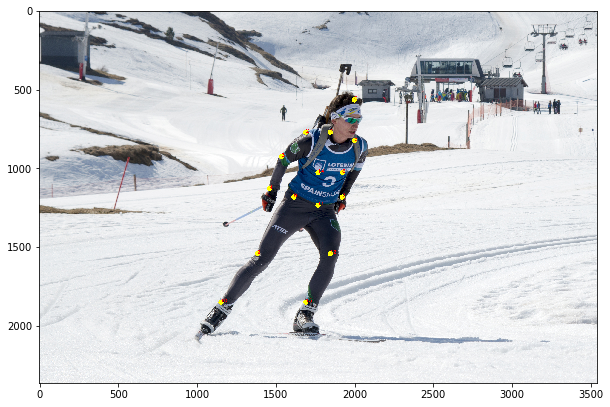

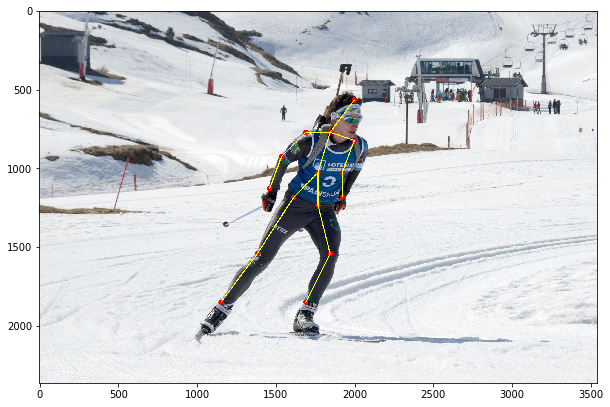

In [7]:
# Empty list to store the detected keypoints
points = []

sPoint = 2

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frameCopy, (int(x), int(y)), 8*sPoint, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
        cv2.circle(frame, (int(x), int(y)), 8*sPoint, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else:
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3*sPoint)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))